# Step 1: Exploring Data

The purpose of this notebook is to do some preliminary basic data exploration. The goal is to better understand the data. This notebook attemps to answer questions such as how many unique models, how many unique vendors, missing data, correlation of the covariates and label, any intersting patterns in the SMART stats over time, etc.

In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd

from matplotlib import pyplot as plt
import seaborn as sns

import pdb

In [2]:
# inferred int64 types cause a type mismatch (int vs float) error when dask sees a null value
# null values cannot be interpreted as ints
custom_dtypes = {
    "date": "object",
    "serial_number": "object",
    "model": "object",
    "capacity_bytes": "float64",
    "failure": "float64",
    "smart_1_normalized": "float64",
    "smart_1_raw": "float64",
    "smart_2_normalized": "float64",
    "smart_2_raw": "float64",
    "smart_3_normalized": "float64",
    "smart_3_raw": "float64",
    "smart_4_normalized": "float64",
    "smart_4_raw": "float64",
    "smart_5_normalized": "float64",
    "smart_5_raw": "float64",
    "smart_7_normalized": "float64",
    "smart_7_raw": "float64",
    "smart_8_normalized": "float64",
    "smart_8_raw": "float64",
    "smart_9_normalized": "float64",
    "smart_9_raw": "float64",
    "smart_10_normalized": "float64",
    "smart_10_raw": "float64",
    "smart_11_normalized": "float64",
    "smart_11_raw": "float64",
    "smart_12_normalized": "float64",
    "smart_12_raw": "float64",
    "smart_13_normalized": "float64",
    "smart_13_raw": "float64",
    "smart_15_normalized": "float64",
    "smart_15_raw": "float64",
    "smart_16_normalized": "float64",
    "smart_16_raw": "float64",
    "smart_17_normalized": "float64",
    "smart_17_raw": "float64",
    "smart_22_normalized": "float64",
    "smart_22_raw": "float64",
    "smart_23_normalized": "float64",
    "smart_23_raw": "float64",
    "smart_24_normalized": "float64",
    "smart_24_raw": "float64",
    "smart_168_normalized": "float64",
    "smart_168_raw": "float64",
    "smart_170_normalized": "float64",
    "smart_170_raw": "float64",
    "smart_173_normalized": "float64",
    "smart_173_raw": "float64",
    "smart_174_normalized": "float64",
    "smart_174_raw": "float64",
    "smart_177_normalized": "float64",
    "smart_177_raw": "float64",
    "smart_179_normalized": "float64",
    "smart_179_raw": "float64",
    "smart_181_normalized": "float64",
    "smart_181_raw": "float64",
    "smart_182_normalized": "float64",
    "smart_182_raw": "float64",
    "smart_183_normalized": "float64",
    "smart_183_raw": "float64",
    "smart_184_normalized": "float64",
    "smart_184_raw": "float64",
    "smart_187_normalized": "float64",
    "smart_187_raw": "float64",
    "smart_188_normalized": "float64",
    "smart_188_raw": "float64",
    "smart_189_normalized": "float64",
    "smart_189_raw": "float64",
    "smart_190_normalized": "float64",
    "smart_190_raw": "float64",
    "smart_191_normalized": "float64",
    "smart_191_raw": "float64",
    "smart_192_normalized": "float64",
    "smart_192_raw": "float64",
    "smart_193_normalized": "float64",
    "smart_193_raw": "float64",
    "smart_194_normalized": "float64",
    "smart_194_raw": "float64",
    "smart_195_normalized": "float64",
    "smart_195_raw": "float64",
    "smart_196_normalized": "float64",
    "smart_196_raw": "float64",
    "smart_197_normalized": "float64",
    "smart_197_raw": "float64",
    "smart_198_normalized": "float64",
    "smart_198_raw": "float64",
    "smart_199_normalized": "float64",
    "smart_199_raw": "float64",
    "smart_200_normalized": "float64",
    "smart_200_raw": "float64",
    "smart_201_normalized": "float64",
    "smart_201_raw": "float64",
    "smart_218_normalized": "float64",
    "smart_218_raw": "float64",
    "smart_220_normalized": "float64",
    "smart_220_raw": "float64",
    "smart_222_normalized": "float64",
    "smart_222_raw": "float64",
    "smart_223_normalized": "float64",
    "smart_223_raw": "float64",
    "smart_224_normalized": "float64",
    "smart_224_raw": "float64",
    "smart_225_normalized": "float64",
    "smart_225_raw": "float64",
    "smart_226_normalized": "float64",
    "smart_226_raw": "float64",
    "smart_231_normalized": "float64",
    "smart_231_raw": "float64",
    "smart_232_normalized": "float64",
    "smart_232_raw": "float64",
    "smart_233_normalized": "float64",
    "smart_233_raw": "float64",
    "smart_235_normalized": "float64",
    "smart_235_raw": "float64",
    "smart_240_normalized": "float64",
    "smart_240_raw": "float64",
    "smart_241_normalized": "float64",
    "smart_241_raw": "float64",
    "smart_242_normalized": "float64",
    "smart_242_raw": "float64",
    "smart_250_normalized": "float64",
    "smart_250_raw": "float64",
    "smart_251_normalized": "float64",
    "smart_251_raw": "float64",
    "smart_252_normalized": "float64",
    "smart_252_raw": "float64",
    "smart_254_normalized": "float64",
    "smart_254_raw": "float64",
    "smart_255_normalized": "float64",
    "smart_255_raw": "float64",
}

In [3]:
# read all the data into one dataframe
# TODO: move to reading from Ceph after slow read blocker is removed
df = dd.read_csv("/home/kachauha/Downloads/data_Q4_2018/*.csv", dtype=custom_dtypes)

## Summaries

In [4]:
# get the serial numbers for all the failed hard drives, date of failure, and its model
failed_serials = df[df['failure']==1][['date', 'serial_number', 'model']].compute()
# print(failed_serials.shape)    # (393, 3)
failed_serials.head()

,date,serial_number,model
24449,2018-10-01,S2ZYJ9CFC01460,ST500LM012 HN
29978,2018-10-01,Z305B8DE,ST4000DM000
38504,2018-10-01,ZA10CTP4,ST8000DM002
38544,2018-10-01,ZA114N2J,ST8000DM002
40880,2018-10-01,ZCH0CLFQ,ST12000NM0007


In [5]:
failed_serials.tail()

,date,serial_number,model
47582,2018-12-30,PL2331LAGSUD2J,HGST HMS5C4040ALE640
63756,2018-12-30,Z3025L0M,ST4000DM000
21700,2018-12-31,ZCH07CVK,ST12000NM0007
35745,2018-12-31,ZCH09GNA,ST12000NM0007
89121,2018-12-31,ZCH0841G,ST12000NM0007


In [6]:
# get the serial numbers for all the failed hard drives, date of failure, and its model
working_serials = df[~df['serial_number'].isin(failed_serials['serial_number'])][['date', 'serial_number', 'model']]\
                    .drop_duplicates(subset='serial_number', keep='last')\
                    .compute()
# print(working_serials.shape)    # (108325, 3)
working_serials.head()

,date,serial_number,model
2203,2018-10-02,Z300XGTR,ST4000DM000
4389,2018-10-02,Z300XA99,ST4000DM000
4900,2018-10-02,Z3015BTR,ST4000DM000
6971,2018-10-02,Z300WWNK,ST4000DM000
7928,2018-10-02,PL2331LAGSSUNJ,HGST HMS5C4040ALE640


In [7]:
working_serials.tail()

,date,serial_number,model
106911,2018-12-31,PL1331LAHD1AWH,HGST HMS5C4040BLE640
106912,2018-12-31,ZA10MCEQ,ST8000DM002
106913,2018-12-31,PL1331LAHD0AHH,HGST HMS5C4040BLE640
106914,2018-12-31,PL1331LAHD1T5H,HGST HMS5C4040BLE640
106915,2018-12-31,Z30271GD,ST4000DM000


In [8]:
# sanity check - make sure we havent labelled a serial number as BOTH working and failed
working_serials['serial_number'].isin(failed_serials['serial_number']).any()

False

In [9]:
# are there any specific models that failed more so than the others?
model_stats = pd.merge(failed_serials['model'].value_counts().to_frame('failed_count').reset_index(),
                        working_serials['model'].value_counts().to_frame('working_count').reset_index(),
                        how='outer').fillna(0)

# # sanity check - did the merge include all the observations or did it drop any?
# (foo['index'].isin(tmp['index'])).all() and (bar['index'].isin(tmp['index']).all())    # True

# percentage of instances that have failed, per model
model_stats['fail_percent'] = 100 * model_stats['failed_count'] / (model_stats['failed_count'] + model_stats['working_count'])
model_stats

,index,failed_count,working_count,fail_percent
0,ST12000NM0007,130.0,31144,0.415681
1,ST4000DM000,121.0,24274,0.496003
2,ST8000NM0055,39.0,14384,0.270401
3,ST8000DM002,24.0,9874,0.242473
4,HGST HMS5C4040BLE640,18.0,14649,0.122724
5,ST500LM012 HN,13.0,613,2.076677
6,TOSHIBA MQ01ABF050,12.0,528,2.222222
7,TOSHIBA MG07ACA14TA,7.0,1220,0.570497
8,ST500LM030,7.0,111,5.932203
9,HGST HMS5C4040ALE640,7.0,4836,0.144539


### NOTE: unique vendors are seagate, wdc, hgst, hitachi, toshiba

In [10]:
# TODO: should we create a corr matrix for model vs failure or would it lead to misinterpretation of information

## Analyze Critical Stats

These are the columns specified by wikipedia, backblaze, and ibm research as good predictors

In [22]:
CRITICAL_STATS = [5, 7, 10, 184, 187, 188, 189, 190, 193, 194, 196, 197, 198, 201, 240, 241, 242]

# NOTE - THESE LISTS ARE SUBJECT TO CHANGE
crit_cols_raw = ['smart_{}_raw'.format(i) for i in CRITICAL_STATS]
crit_cols_normalized = ['smart_{}_normalized'.format(i) for i in CRITICAL_STATS]

### SMART Stats Descriptions
Source: Wikipedia

Putting descriptions here to help better make sense of the results that follow.

184 = end to end error / ioedc : This attribute is a part of Hewlett-Packard's SMART IV technology, as well as part of other vendors' IO Error Detection and Correction schemas, and it contains a count of parity errors which occur in the data path to the media via the drive's cache RAM.

187 = reported uncorrectable errors : The count of errors that could not be recovered using hardware ECC (see attribute 195)

188 = command timeout : The count of aborted operations due to HDD timeout. Normally this attribute value should be equal to zero.

189 = high fly write : This feature is implemented in most modern Seagate drives and some of Western Digital's drives, beginning with the WD Enterprise WDE18300 and WDE9180 Ultra2 SCSI hard drives, and will be included on all future WD Enterprise products.

190 = temp diff / airflow diff : Value is equal to (100-temp. °C), allowing manufacturer to set a minimum threshold which corresponds to a maximum temperature. This also follows the convention of 100 being a best-case value and lower values being undesirable. However, some older drives may instead report raw Temperature (identical to 0xC2) or Temperature minus 50 here.

196 = reallocation event count : Count of remap operations. The raw value of this attribute shows the total count of attempts to transfer data from reallocated sectors to a spare area. Both successful and unsuccessful attempts are counted

201 = soft read eror rate or TA counter detected : Count indicates the number of uncorrectable software read errors.

In [23]:
# number of nans
print('Total observations:', dd.compute(df.shape[0]))
print('nan counts:')
df[crit_cols_raw + crit_cols_normalized].isna().sum().compute()

Total observations: (9357609,)
nan counts:


smart_5_raw                 863
smart_7_raw                 863
smart_10_raw                863
smart_184_raw           4721683
smart_187_raw           2261196
smart_188_raw           2261196
smart_189_raw           4721683
smart_190_raw           2261196
smart_193_raw             56221
smart_194_raw               363
smart_196_raw           7097276
smart_197_raw               863
smart_198_raw               863
smart_201_raw           9357609
smart_240_raw           2048040
smart_241_raw           2259950
smart_242_raw           2259950
smart_5_normalized          863
smart_7_normalized          863
smart_10_normalized         863
smart_184_normalized    4721683
smart_187_normalized    2261196
smart_188_normalized    2261196
smart_189_normalized    4721683
smart_190_normalized    2261196
smart_193_normalized      56221
smart_194_normalized        363
smart_196_normalized    7097276
smart_197_normalized        863
smart_198_normalized        863
smart_201_normalized    9357609
smart_24

### TODO: are the nans meaningless or do they imply 0?

In [24]:
# NOTE: the columns with all values NAN must be removed otherwise a value error is thrown
crit_cols_raw.remove('smart_201_raw')
crit_cols_normalized.remove('smart_201_normalized')

In [17]:
# general description
summary = df[crit_cols_raw + crit_cols_normalized].describe().compute()
summary

,smart_5_raw,smart_7_raw,smart_10_raw,smart_184_raw,smart_187_raw,smart_188_raw,smart_189_raw,smart_190_raw,smart_193_raw,smart_194_raw,...,smart_189_normalized,smart_190_normalized,smart_193_normalized,smart_194_normalized,smart_196_normalized,smart_197_normalized,smart_198_normalized,smart_240_normalized,smart_241_normalized,smart_242_normalized
count,9.356746e+06,9.356746e+06,9.356746e+06,4.635926e+06,7.096413e+06,7.096413e+06,4.635926e+06,7.096413e+06,9.301388e+06,9.357246e+06,...,4.635926e+06,7.096413e+06,9.301388e+06,9.357246e+06,2.260333e+06,9.356746e+06,9.356746e+06,7.309569e+06,7.097659e+06,7.097659e+06
mean,5.758754e+00,1.668407e+09,2.204315e+01,3.828146e-03,7.047532e-02,8.081638e+07,6.583353e+00,2.917716e+01,1.529214e+04,2.912181e+01,...,9.905657e+01,7.082284e+01,9.394564e+01,6.880345e+01,1.067165e+02,1.016213e+02,1.009117e+02,9.996057e+01,1.000128e+02,1.000128e+02
std,3.179134e+02,4.613208e+10,1.696482e+03,3.651873e-01,2.097952e+00,3.313243e+09,5.047425e+02,6.324315e+00,4.376572e+04,5.872002e+00,...,5.412752e+00,6.324315e+00,1.778591e+01,7.406983e+01,2.865193e+01,1.434108e+01,1.169487e+01,1.312996e+00,1.132854e+00,1.132854e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,1.000000e+00,1.200000e+01,...,1.000000e+00,4.400000e+01,1.000000e+00,1.400000e+01,1.200000e+01,3.900000e+01,3.900000e+01,3.200000e+01,1.000000e+02,1.000000e+02
25%,0.000000e+00,3.757985e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.600000e+01,3.850000e+02,2.700000e+01,...,1.000000e+02,6.700000e+01,9.800000e+01,2.900000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
50%,0.000000e+00,4.826357e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01,3.049000e+03,3.100000e+01,...,1.000000e+02,7.300000e+01,1.000000e+02,3.700000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
75%,0.000000e+00,1.268629e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.600000e+01,1.404325e+04,3.500000e+01,...,1.000000e+02,7.700000e+01,1.000000e+02,1.870000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
max,5.532000e+04,1.064935e+13,3.276800e+05,7.200000e+01,5.240000e+02,6.013057e+11,6.553500e+04,5.600000e+01,1.104852e+06,5.600000e+01,...,1.000000e+02,8.600000e+01,2.000000e+02,2.530000e+02,2.520000e+02,2.520000e+02,2.520000e+02,1.000000e+02,2.000000e+02,2.000000e+02


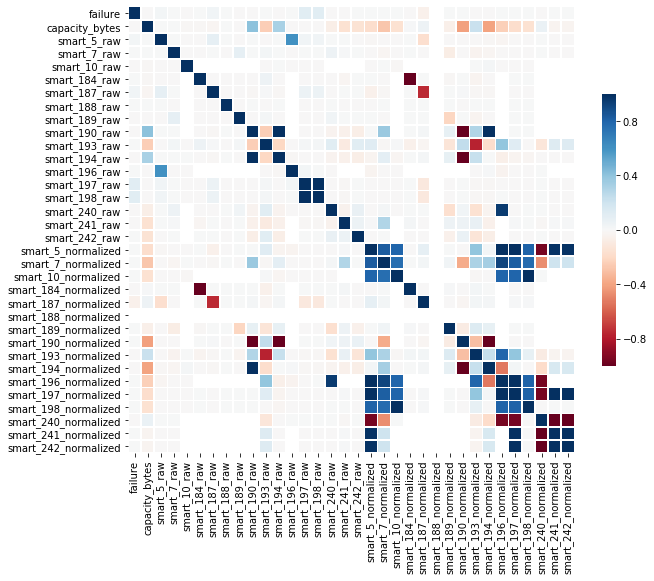

In [20]:
# correlation with failure
corr_mat = df[['failure', 'capacity_bytes'] + crit_cols_raw + crit_cols_normalized].corr().compute()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_mat,
            ax=ax,
            vmin=-1, 
            vmax=1,
            square=True,
            linewidths=.5,
            cmap='RdBu',
            cbar_kws={"shrink": .5})

In [76]:
# TODO: Might be better to call compute to get the combined data of all serials in subset
# as opposed to calling it for earch serial number in for loop

/home/kachauha/.local/share/virtualenvs/ceph_drive_failure-3-2yJKyM/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


1 / 50. Drive serial number ZJV00AEP
2 / 50. Drive serial number ZCH07GNX
3 / 50. Drive serial number Z304JZJQ
4 / 50. Drive serial number Z3041C62
5 / 50. Drive serial number PL2331LAGSUD2J
6 / 50. Drive serial number ZCH0GBHG
7 / 50. Drive serial number PL1331LAHGEV3H
8 / 50. Drive serial number Z303Y442
9 / 50. Drive serial number ZCH0CDL3
10 / 50. Drive serial number ZA1438NC
11 / 50. Drive serial number ZCH070ZQ
12 / 50. Drive serial number S2ZYJ9GGB00982
13 / 50. Drive serial number ZCH07RVM
14 / 50. Drive serial number ZCH0CE47
15 / 50. Drive serial number ZCH06J4X
16 / 50. Drive serial number Z304KC77
17 / 50. Drive serial number ZCH0CC4V
18 / 50. Drive serial number ZA16RV57
19 / 50. Drive serial number ZCH0657N
20 / 50. Drive serial number ZCH073Z9
21 / 50. Drive serial number S300WDLE
22 / 50. Drive serial number Z3025L0M
23 / 50. Drive serial number ZJV065H9
24 / 50. Drive serial number S2ZYJ9CFC01460
25 / 50. Drive serial number ZCH08BW0
26 / 50. Drive serial number ZCH0CZ

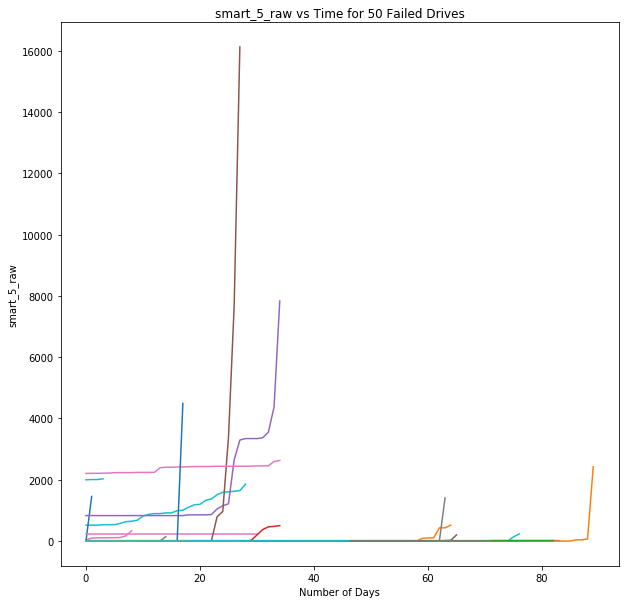

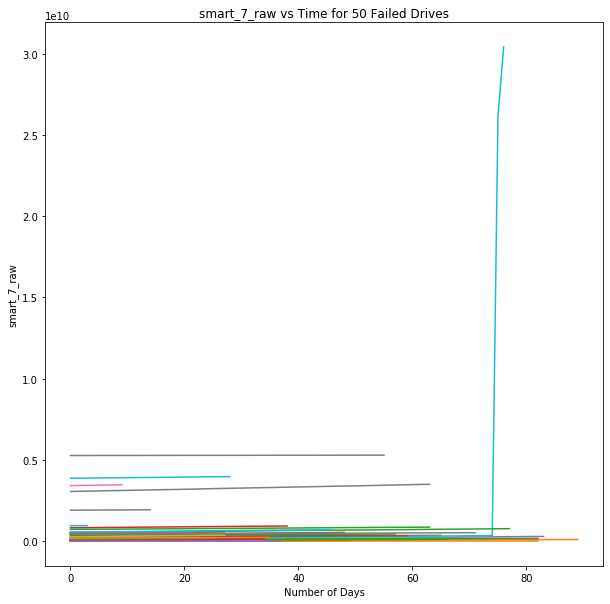

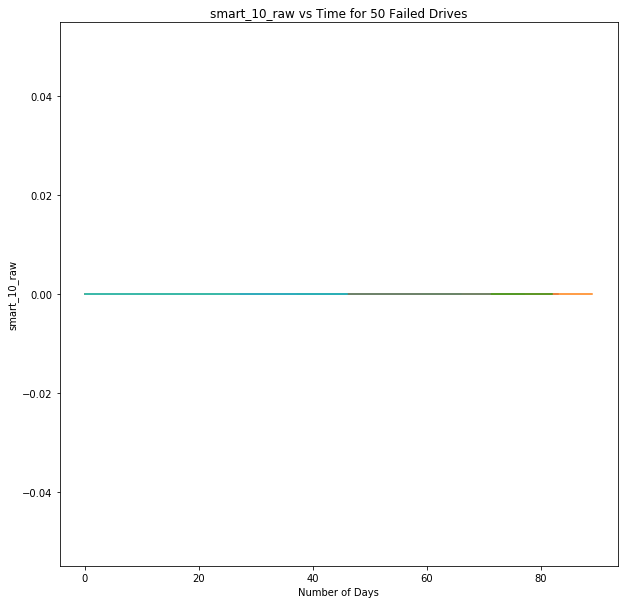

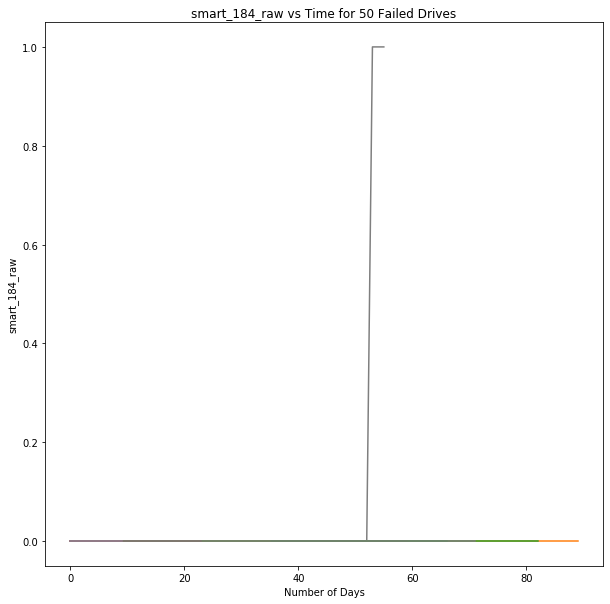

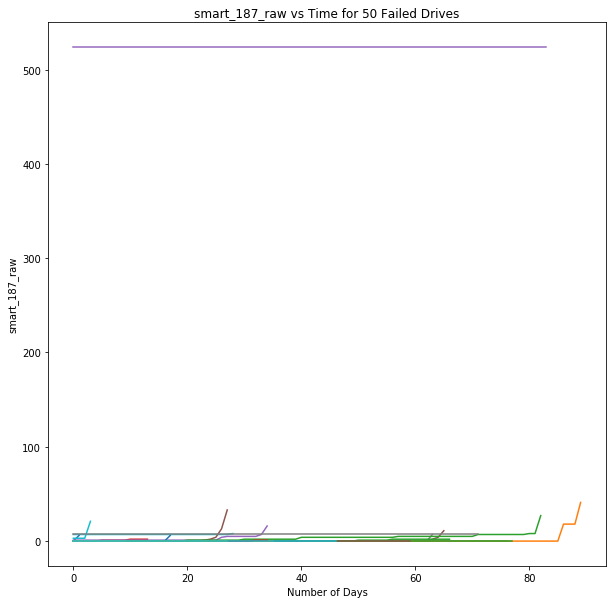

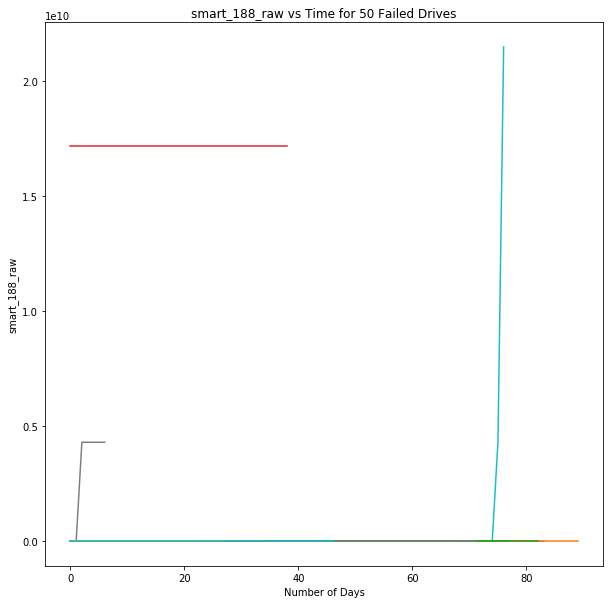

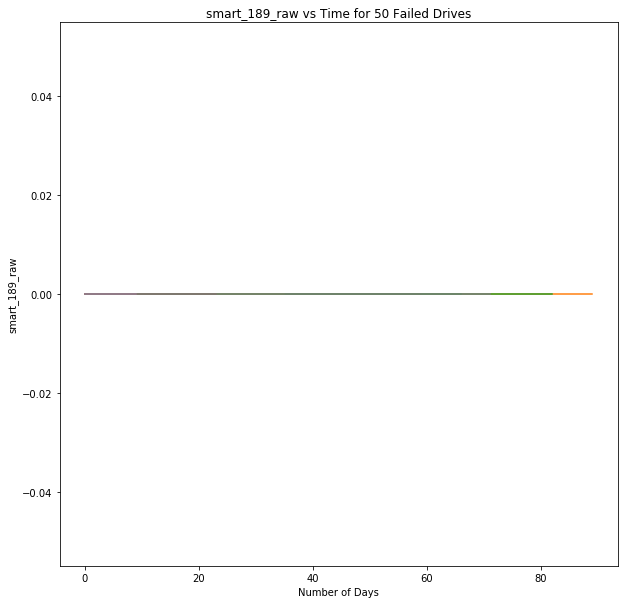

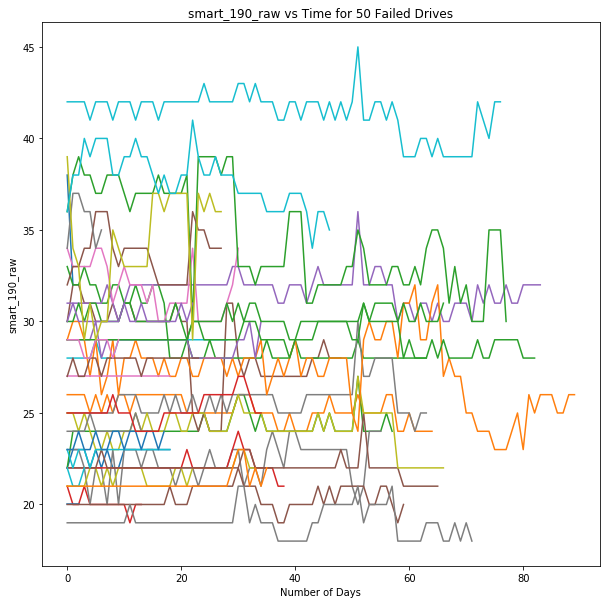

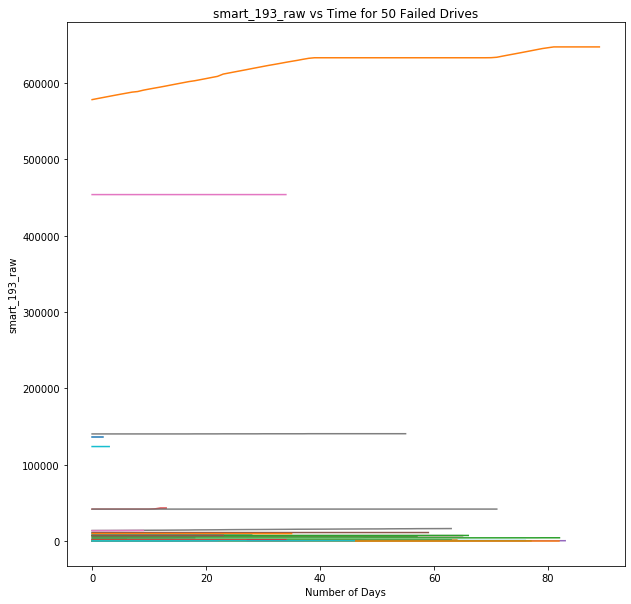

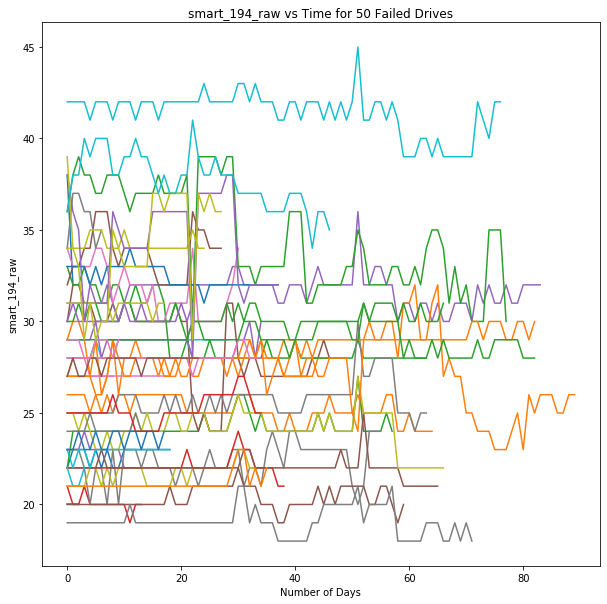

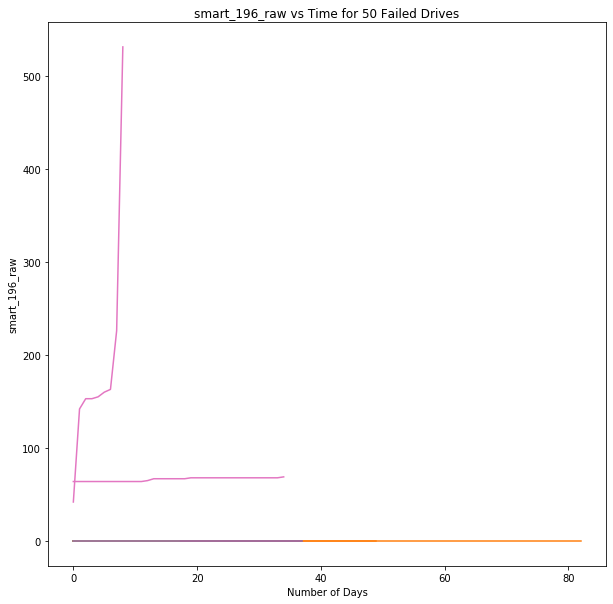

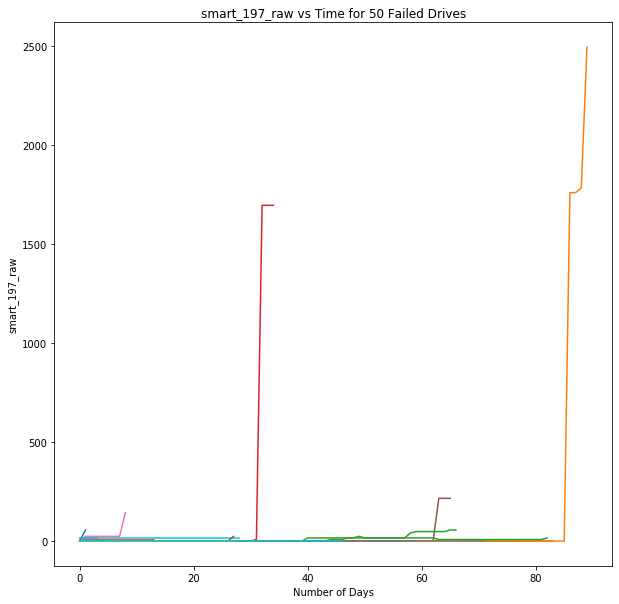

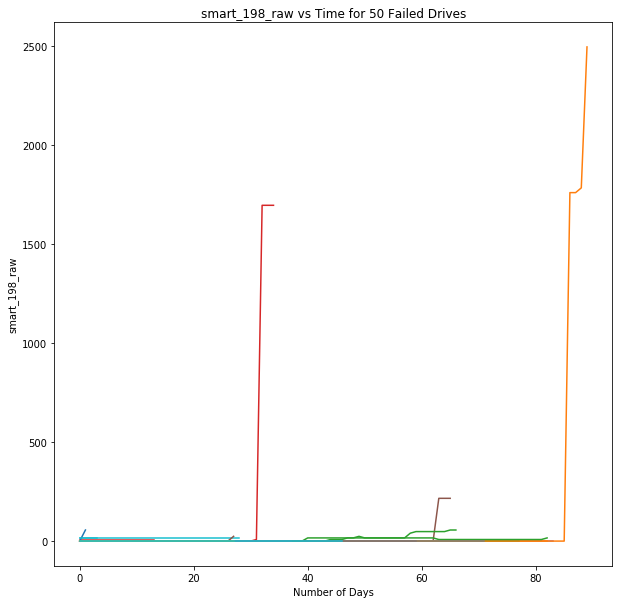

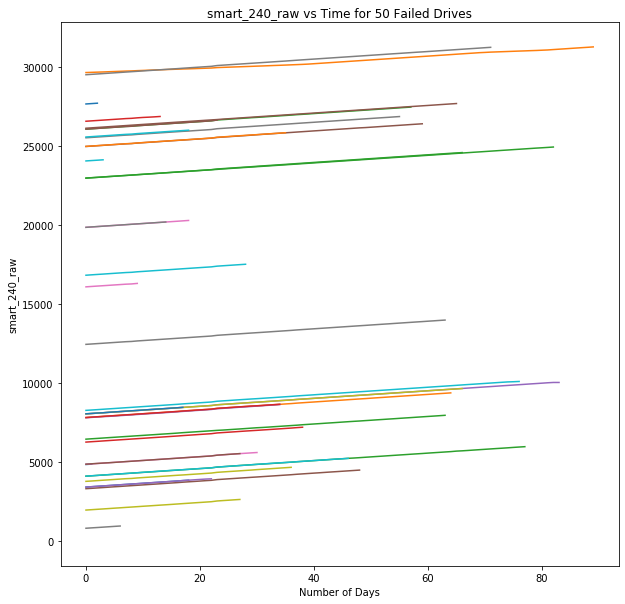

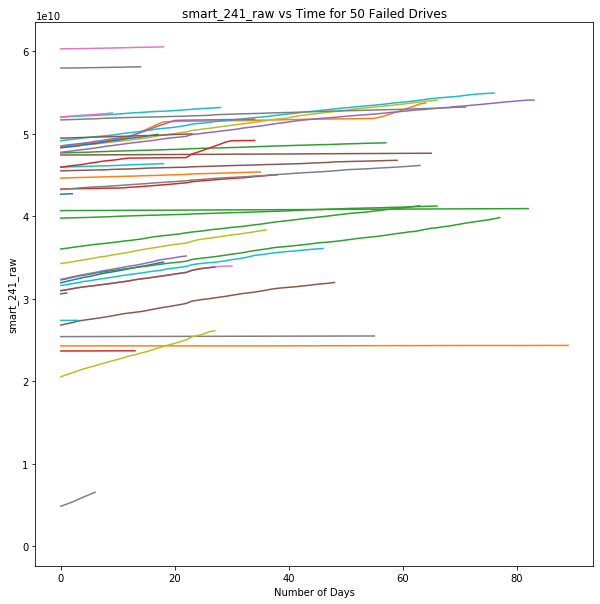

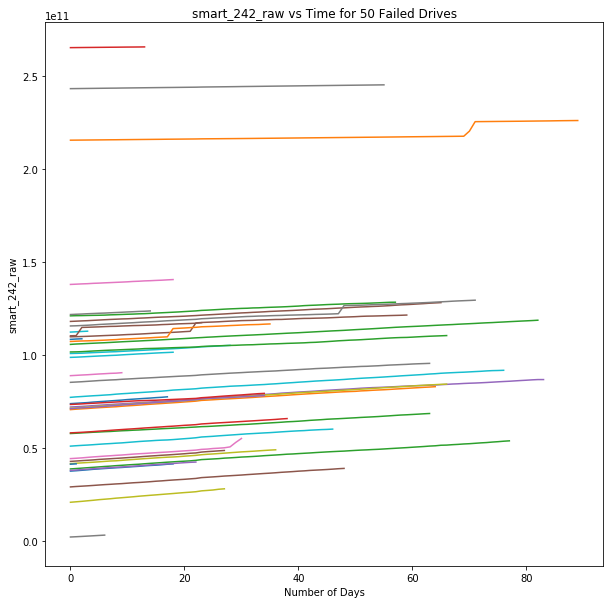

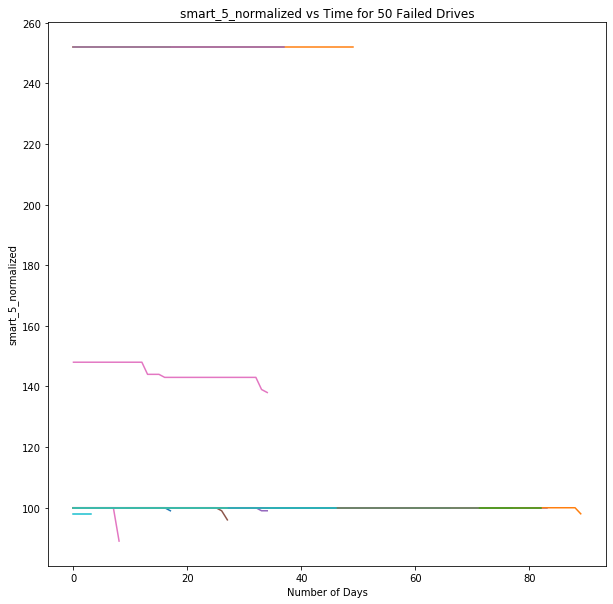

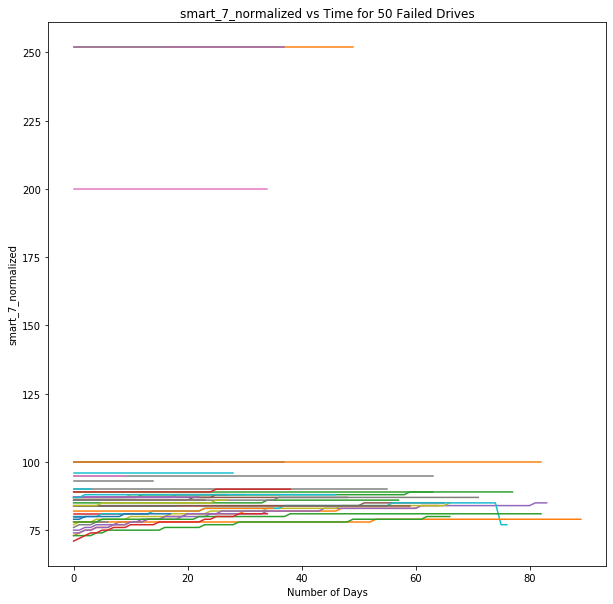

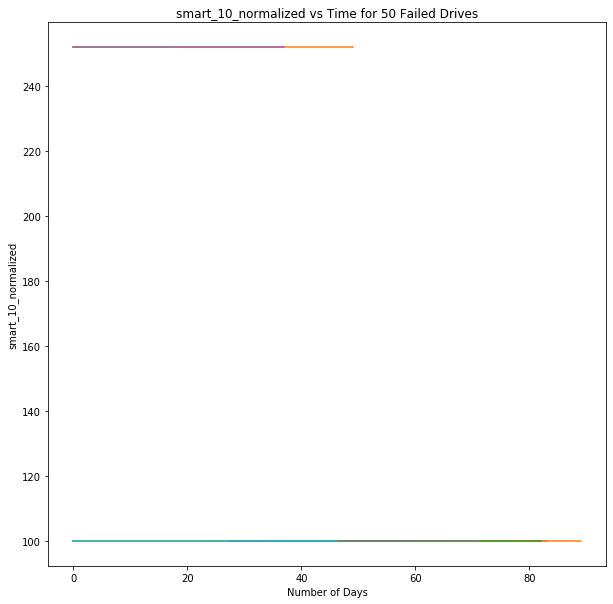

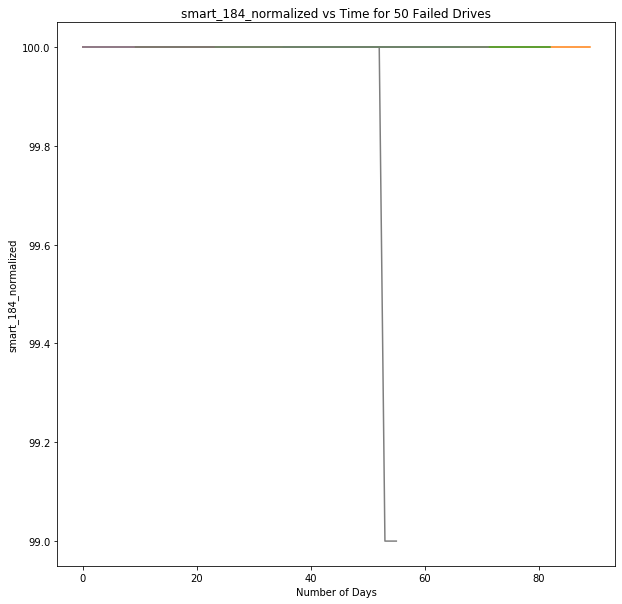

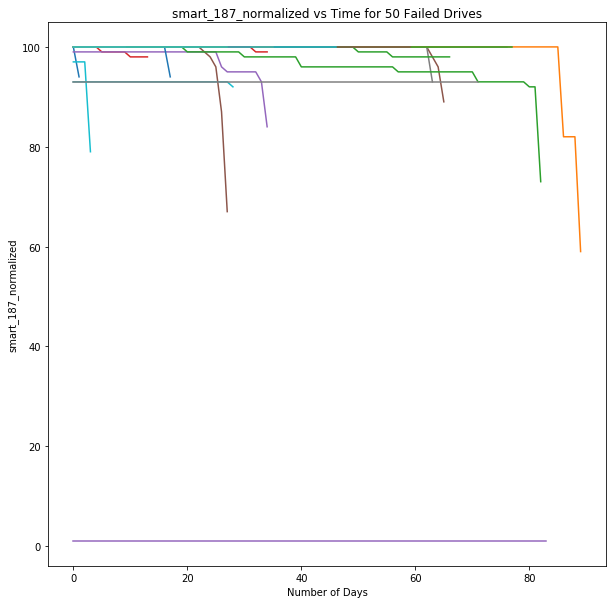

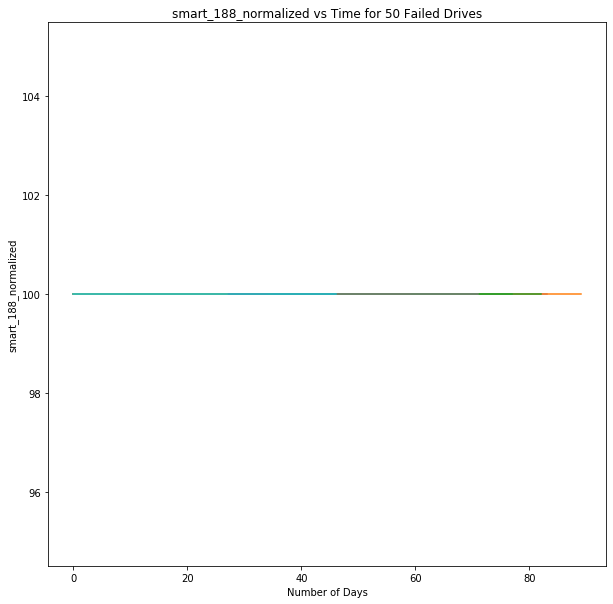

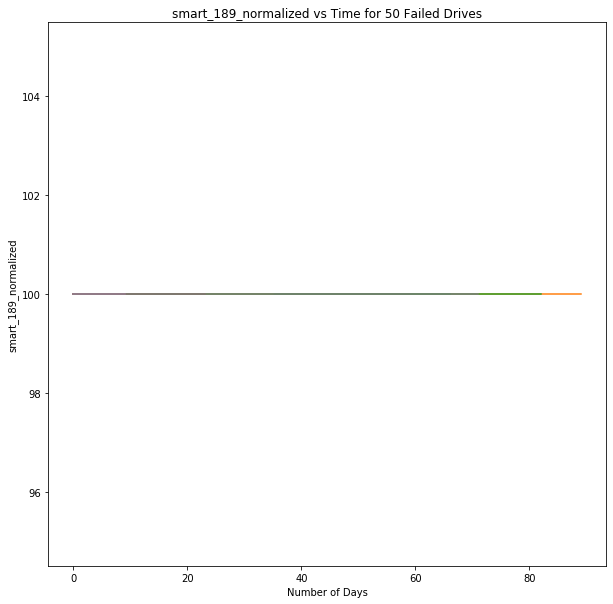

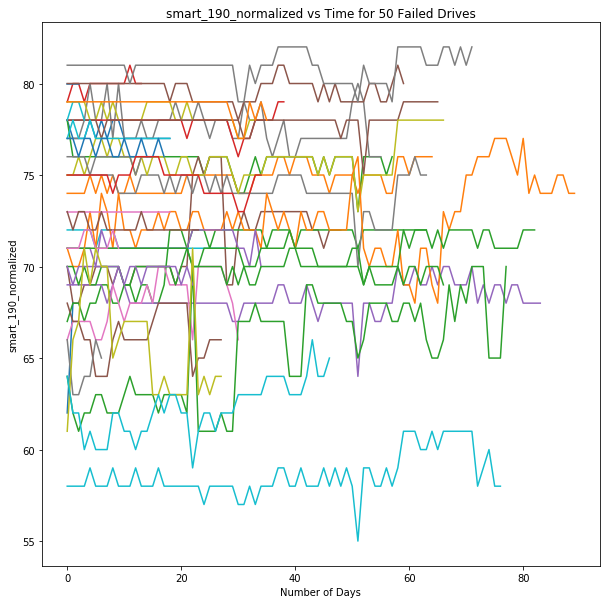

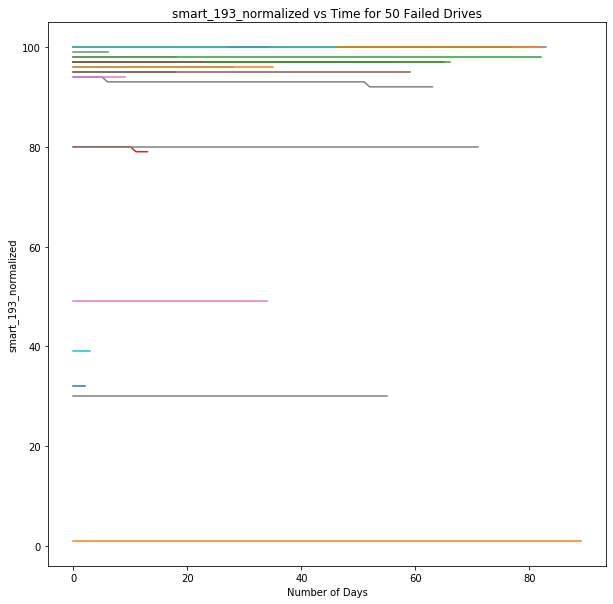

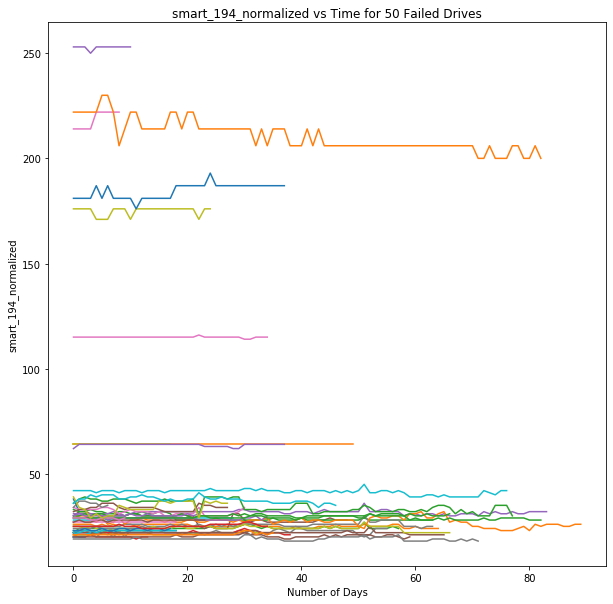

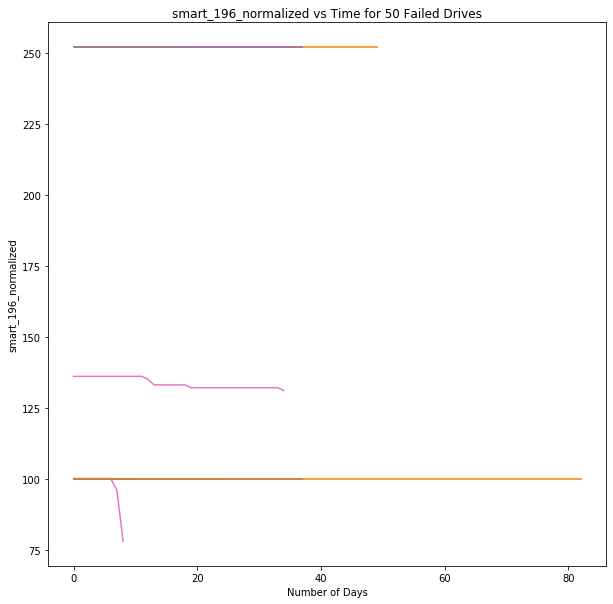

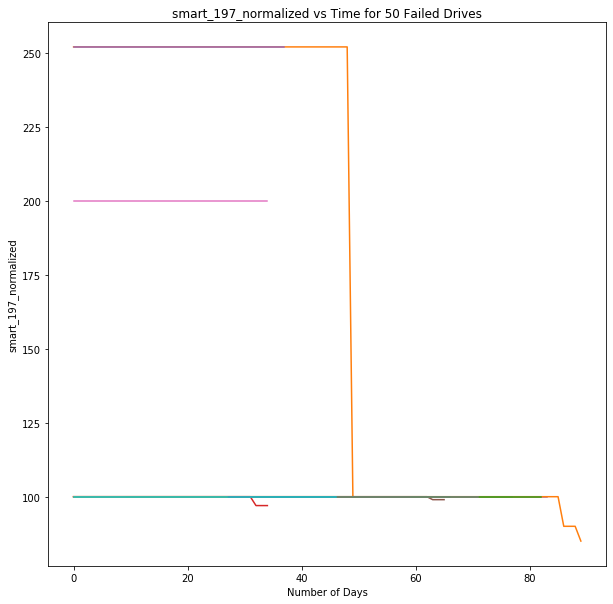

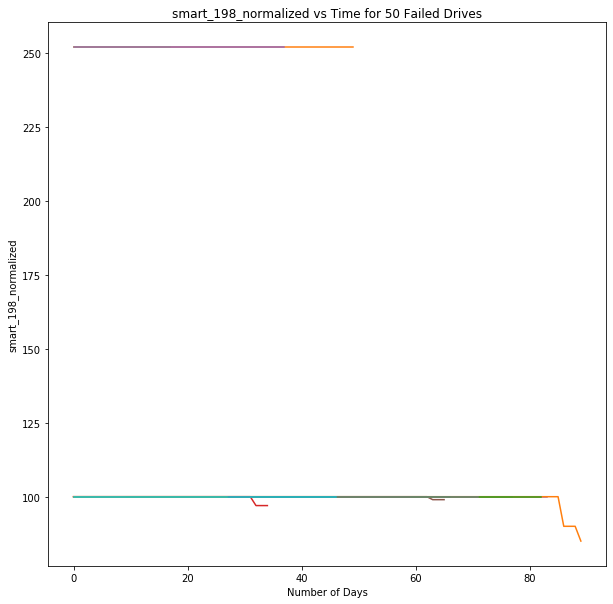

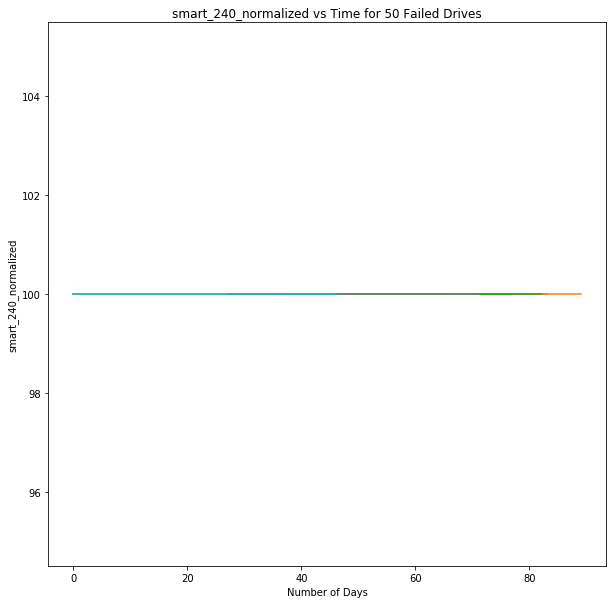

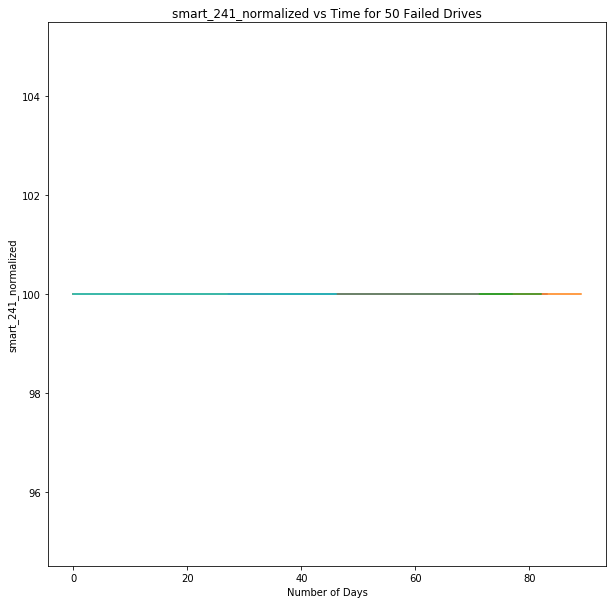

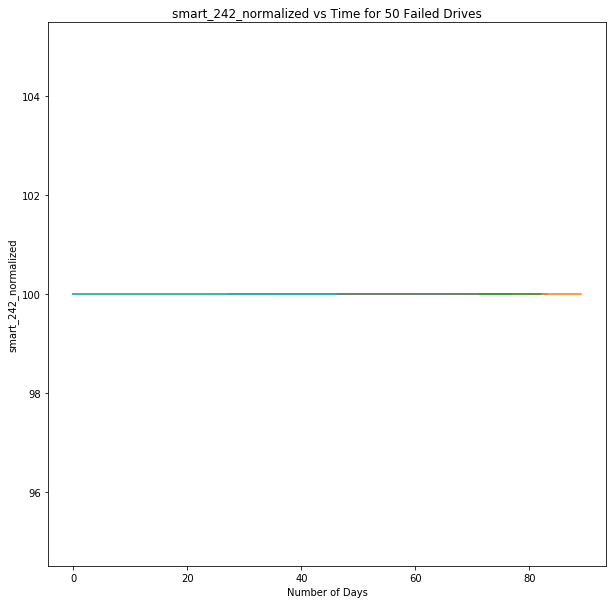

In [88]:
# NOTE: running this cell will take a VERY long time (~1hr on intel i7 w/ 16GB ram)
# adjust NUM_DRIVES_TO_SAMPLE to select a small subset to use for plotting
NUM_DRIVES_TO_SAMPLE = 50

# plots for smart stat 5
# cols_to_plot = ['smart_5_raw', 'smart_7_raw']
cols_to_plot = crit_cols_raw + crit_cols_normalized
cols_to_plot.remove('smart_201_raw')            # too many nans
cols_to_plot.remove('smart_201_normalized')     # too many nans

# one figure per smart stat
figs = [plt.figure(i, figsize=(10, 10)) for i in range(len(cols_to_plot))]
axes = [f.add_subplot(111) for f in figs]
for colname, ax in zip(cols_to_plot, axes):
    ax.set_title('{} vs Time for {} Failed Drives'.format(colname, NUM_DRIVES_TO_SAMPLE))
    ax.set_xlabel('Number of Days')
    ax.set_ylabel(colname)
    
# keep track of what hard drives were used to generate the data. NOTE: only the first 16 chars of ser will be saved
failed_ser_subset = np.empty(shape=(NUM_DRIVES_TO_SAMPLE), dtype='<S16')

# make the figures
for i, ser in enumerate(failed_serials['serial_number'].sample(NUM_DRIVES_TO_SAMPLE, random_state=42)):
    # log serial numbers which are being used
    failed_ser_subset[i] = ser
    print('{} / {}. Drive serial number {}'.format(i + 1, NUM_DRIVES_TO_SAMPLE, ser))
    
    # get teh data to make the figures
    drive_data = df[df['serial_number']==ser][cols_to_plot].compute()
    
    # dummy x axis data
    xvals = [i for i in range(drive_data.shape[0])]
    
    # make the plot
    for ax, c in zip(axes, cols_to_plot):
        ax.plot(xvals, drive_data[c])

# save the figures
for f, c in zip(figs, cols_to_plot):
    f.savefig('img/{}_failed.png'.format(c))

# save the serial numbres used in figures
np.save('failed_graphs_serials', failed_ser_subset)

In [89]:
# sample to use for plotting
NUM_DRIVES_TO_SAMPLE = 50

# one figure per smart stat
for colname, ax in zip(cols_to_plot, axes):
    ax.cla()    # clear data from previous plots
    ax.set_title('{} vs Time for {} Working Drives'.format(colname, NUM_DRIVES_TO_SAMPLE))
    ax.set_xlabel('Number of Days')
    ax.set_ylabel(colname)
    
# keep track of what hard drives were used to generate the data. NOTE: only the first 16 chars of ser will be saved
working_ser_subset = np.empty(shape=(NUM_DRIVES_TO_SAMPLE), dtype='<S16')

# make the figures
for i, ser in enumerate(working_serials['serial_number'].sample(NUM_DRIVES_TO_SAMPLE, random_state=42)):
    # log serial numbers which are being used
    working_ser_subset[i] = ser
    print('{} / {}. Drive serial number {}'.format(i + 1, NUM_DRIVES_TO_SAMPLE, ser))
    
    # get teh data to make the figures
    drive_data = df[df['serial_number']==ser][cols_to_plot].compute()
    
    # dummy x axis data
    xvals = [i for i in range(drive_data.shape[0])]
    
    # make the plot
    for ax, c in zip(axes, cols_to_plot):
        ax.plot(xvals, drive_data[c])

# save the figures
for f, c in zip(figs, cols_to_plot):
    f.savefig('img/{}_working.png'.format(c))

# save the serial numbres used in figures
np.save('working_graphs_serials', working_ser_subset)

1 / 50. Drive serial number ZCH08971
2 / 50. Drive serial number ZA12SVHG
3 / 50. Drive serial number PL1331LAHD1H5H
4 / 50. Drive serial number Z302BTGB
5 / 50. Drive serial number ZJV0WEN9
6 / 50. Drive serial number X7ERT51ST
7 / 50. Drive serial number ZJV0WESK
8 / 50. Drive serial number PL1331LAHE0WGH
9 / 50. Drive serial number Z302SN7X
10 / 50. Drive serial number Z304HSFB
11 / 50. Drive serial number ZJV00GEL
12 / 50. Drive serial number 4589K0VGFMYB
13 / 50. Drive serial number ZA189HVZ
14 / 50. Drive serial number ZA181LGQ
15 / 50. Drive serial number ZA129HH8
16 / 50. Drive serial number ZCH07DLG
17 / 50. Drive serial number Z30597RQ
18 / 50. Drive serial number Z305GVTQ
19 / 50. Drive serial number ZA13ZRZL
20 / 50. Drive serial number ZCH0CJCG
21 / 50. Drive serial number ZJV1373P
22 / 50. Drive serial number ZA149PP3
23 / 50. Drive serial number PL2331LAHDWDTJ
24 / 50. Drive serial number ZJV007BD
25 / 50. Drive serial number Z3059P4N
26 / 50. Drive serial number ZA1855A

In [ ]:
plt.close('all')

### Backblaze's analysis: https://www.backblaze.com/blog/what-smart-stats-indicate-hard-drive-failures/

### PCA? PCR?